In [57]:
import os
import process_results
from importlib import reload

scripts_folder = os.path.join(os.getcwd(), 'scripts')

## Get Performances of MD subjects, Control Subjects and both

In [58]:
reload(process_results)
filename = os.path.join(scripts_folder, 'IntraEvaluation/SupCon_results/EEGNet_1CLS_evaluation_results.txt')
block_averages = process_results.parse_file(filename)

for i, mean in enumerate(block_averages, 1):
    print(f"Block {i} Mean: {list(mean)}")

# Define subject indices
num_control_subjects = 7
num_motor_disabled_subjects = 7
control_indices = list(range(num_control_subjects))  # First 7 subjects
motor_disabled_indices = list(range(num_control_subjects, num_control_subjects + num_motor_disabled_subjects))  # Last 7 subjects
overall_indices = list(range(num_control_subjects + num_motor_disabled_subjects))  # All subjects


# Compute statistics
ft_values = [1, 5, 10]
for i in range(len(ft_values)):
    print(f'Performance for {ft_values[i]} chars')
    control_mean, control_std = process_results.compute_group_statistics(block_averages[i*14:(i+1)*14], control_indices)
    motor_disabled_mean, motor_disabled_std = process_results.compute_group_statistics(block_averages[i*14:(i+1)*14], motor_disabled_indices)
    overall_mean, overall_std = process_results.compute_group_statistics(block_averages[i*14:(i+1)*14], overall_indices)

    # Print results
    print("Performance Analysis:")
    print(f"Control Subjects: {process_results.format_mean_std(control_mean, control_std)}")
    print(f"Motor-Disabled Subjects: {process_results.format_mean_std(motor_disabled_mean, motor_disabled_std)}")
    print(f"Overall (Control + Motor-Disabled): {process_results.format_mean_std(overall_mean, overall_std)}")

print()

selected_indices = [0, 4, 9, 14]
for i in range(len(ft_values)):
    print()
    print(f'Performance for {ft_values[i]} chars')
    control_mean, control_std = process_results.compute_group_statistics(block_averages[i*14:(i+1)*14], control_indices)
    motor_disabled_mean, motor_disabled_std = process_results.compute_group_statistics(block_averages[i*14:(i+1)*14], motor_disabled_indices)
    overall_mean, overall_std = process_results.compute_group_statistics(block_averages[i*14:(i+1)*14], overall_indices)

    # Print results
    print("Performance Analysis:")
    print(f"Control Subjects: {process_results.format_mean_std(control_mean, control_std, selected_indices)}")
    print(f"Motor-Disabled Subjects: {process_results.format_mean_std(motor_disabled_mean, motor_disabled_std, selected_indices)}")
    print(f"Overall (Control + Motor-Disabled): {process_results.format_mean_std(overall_mean, overall_std, selected_indices)}")

Block 1 Mean: [19.79, 33.12, 40.3, 51.63, 60.07, 68.68, 73.83, 77.76, 80.41, 82.51, 86.14, 88.41, 89.22, 90.48, 92.27]
Block 2 Mean: [8.88, 11.96, 14.98, 16.37, 18.91, 21.46, 22.58, 25.02, 27.15, 29.63, 31.59, 33.05, 33.59, 34.1, 34.41]
Block 3 Mean: [12.1, 18.44, 22.57, 29.76, 34.24, 36.58, 41.69, 46.0, 48.81, 52.47, 53.66, 56.34, 59.19, 60.2, 63.29]
Block 4 Mean: [29.39, 44.2, 55.05, 64.24, 70.51, 74.85, 80.41, 84.51, 84.44, 87.59, 90.37, 91.43, 92.31, 92.99, 93.56]
Block 5 Mean: [14.68, 28.27, 36.68, 46.75, 53.73, 54.92, 59.19, 63.76, 67.05, 70.34, 72.17, 76.88, 76.65, 76.61, 77.83]
Block 6 Mean: [12.57, 24.68, 33.93, 43.63, 47.73, 53.97, 57.93, 61.39, 64.88, 65.49, 66.61, 70.37, 72.14, 75.83, 76.68]
Block 7 Mean: [9.49, 14.54, 19.22, 20.47, 23.15, 26.41, 28.51, 32.88, 35.36, 37.22, 38.68, 40.34, 41.46, 43.52, 45.02]
Block 8 Mean: [5.8, 6.13, 7.56, 8.03, 8.81, 9.05, 10.78, 11.79, 12.07, 12.81, 13.08, 12.85, 13.52, 14.27, 14.74]
Block 9 Mean: [21.05, 28.58, 36.37, 43.45, 50.89, 53.75

## Compute 'Diff' Column

In [59]:
file_paths = [
    os.path.join(scripts_folder, 'IntraEvaluation/Supervised_results/EEGNet_1CLS_evaluation_results.txt'),
    os.path.join(scripts_folder, 'IntraEvaluation/SimCLR_results/EEGNet_1CLS_evaluation_results.txt'),
    os.path.join(scripts_folder, 'IntraEvaluation/SupCon_results/EEGNet_1CLS_evaluation_results.txt')
]
eegnet_fig = process_results.get_differences(file_paths, 'EEGNet')


MD SUBJECTS

Analysing data from 1 Retraining Chars

N Trials -> 1

Is data Normally Distributed? - False
Is Variance Homogeneous? - False

Friedman Test results: (F-stat = 224.45229151014308, p_value = 1.823073479209744e-49)
Post-hoc Wilcoxon tests for trial 1:
Wilcoxon test between SupCon and SimCLR: p-value = 1.771063839664356e-40: diff -> 17.53 - 8.54 = 9.00
Wilcoxon test between SimCLR and Supervised: p-value = 2.7184975917937843e-40: diff -> 8.54 - 18.67 = -10.13
Wilcoxon test between SupCon and Supervised: p-value = 0.013053048767385179: diff -> 17.53 - 18.67 = -1.13

N Trials -> 2

Is data Normally Distributed? - False
Is Variance Homogeneous? - False

Friedman Test results: (F-stat = 231.9895209580835, p_value = 4.2083862625532065e-51)
Post-hoc Wilcoxon tests for trial 2:
Wilcoxon test between SimCLR and Supervised: p-value = 3.983507788547528e-45: diff -> 10.63 - 25.67 = -15.04
Wilcoxon test between SupCon and SimCLR: p-value = 6.944516281421997e-41: diff -> 23.50 - 10.63 = 

c:\Users\david_vzsxiay\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\david_vzsxiay\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)



Friedman Test results: (F-stat = 451.90476190476215, p_value = 7.415283840061684e-99)
Post-hoc Wilcoxon tests for trial 3:
Wilcoxon test between SupCon and SimCLR: p-value = 6.393316226422587e-57: diff -> 50.93 - 30.78 = 20.15
Wilcoxon test between SimCLR and Supervised: p-value = 3.1822488523424785e-55: diff -> 30.78 - 48.87 = -18.09
Wilcoxon test between SupCon and Supervised: p-value = 4.334019929466749e-05: diff -> 50.93 - 48.87 = 2.06

N Trials -> 4

Is data Normally Distributed? - False
Is Variance Homogeneous? - False

Friedman Test results: (F-stat = 456.1505847953215, p_value = 8.87480977868192e-100)
Post-hoc Wilcoxon tests for trial 4:
Wilcoxon test between SupCon and SimCLR: p-value = 7.028914364471602e-58: diff -> 61.11 - 37.66 = 23.45
Wilcoxon test between SimCLR and Supervised: p-value = 1.8761759545935446e-55: diff -> 37.66 - 58.48 = -20.82
Wilcoxon test between SupCon and Supervised: p-value = 7.217370908239858e-06: diff -> 61.11 - 58.48 = 2.63

N Trials -> 5

Is data 

In [60]:
file_paths = [
    os.path.join(scripts_folder, 'IntraEvaluation/Supervised_results/EEGInception_1CLS_evaluation_results.txt'),
    os.path.join(scripts_folder, 'IntraEvaluation/SimCLR_results/EEGInception_1CLS_evaluation_results.txt'),
    os.path.join(scripts_folder, 'IntraEvaluation/SupCon_results/EEGInception_1CLS_evaluation_results.txt')
]
eeginception_fig = process_results.get_differences(file_paths, 'EEGInception')


MD SUBJECTS

Analysing data from 1 Retraining Chars

N Trials -> 1

Is data Normally Distributed? - False
Is Variance Homogeneous? - False

Friedman Test results: (F-stat = 313.42520265291085, p_value = 8.721315530518831e-69)
Post-hoc Wilcoxon tests for trial 1:
Wilcoxon test between SimCLR and Supervised: p-value = 1.52783529305904e-51: diff -> 6.50 - 20.67 = -14.18
Wilcoxon test between SupCon and SimCLR: p-value = 4.9391466459985886e-39: diff -> 15.34 - 6.50 = 8.84
Wilcoxon test between SupCon and Supervised: p-value = 7.254620782387343e-22: diff -> 15.34 - 20.67 = -5.33

N Trials -> 2

Is data Normally Distributed? - False
Is Variance Homogeneous? - False

Friedman Test results: (F-stat = 348.63025830258266, p_value = 1.9765203827643648e-76)
Post-hoc Wilcoxon tests for trial 2:
Wilcoxon test between SimCLR and Supervised: p-value = 3.037518211927882e-53: diff -> 8.15 - 28.30 = -20.15
Wilcoxon test between SupCon and SimCLR: p-value = 1.809545455211547e-41: diff -> 20.99 - 8.15 = 1

In [61]:
file_paths = [
    os.path.join(scripts_folder, 'IntraEvaluation/Supervised_results/Conformer_1CLS_evaluation_results.txt'),
    os.path.join(scripts_folder, 'IntraEvaluation/SimCLR_results/Conformer_1CLS_evaluation_results.txt'),
    os.path.join(scripts_folder, 'IntraEvaluation/SupCon_results/Conformer_1CLS_evaluation_results.txt')
]
conformer_fig = process_results.get_differences(file_paths, 'Conformer')


MD SUBJECTS

Analysing data from 1 Retraining Chars

N Trials -> 1

Is data Normally Distributed? - False
Is Variance Homogeneous? - False

Friedman Test results: (F-stat = 256.04932735426013, p_value = 2.5095451724696854e-56)
Post-hoc Wilcoxon tests for trial 1:
Wilcoxon test between SimCLR and Supervised: p-value = 3.066460999657657e-45: diff -> 8.10 - 17.80 = -9.70
Wilcoxon test between SupCon and SimCLR: p-value = 8.055561557783934e-40: diff -> 16.92 - 8.10 = 8.82
Wilcoxon test between SupCon and Supervised: p-value = 0.12729215051643236: diff -> 16.92 - 17.80 = -0.88

N Trials -> 2

Is data Normally Distributed? - False
Is Variance Homogeneous? - False

Friedman Test results: (F-stat = 259.00371195248664, p_value = 5.728732628027825e-57)
Post-hoc Wilcoxon tests for trial 2:
Wilcoxon test between SimCLR and Supervised: p-value = 2.0260990025379234e-44: diff -> 10.49 - 24.39 = -13.91
Wilcoxon test between SupCon and SimCLR: p-value = 6.894742690881083e-43: diff -> 23.14 - 10.49 = 1

## Plot Results

Analysing data from 1 Retraining Chars

N Trials -> 1

Is data Normally Distributed? - False
Is Variance Homogeneous? - False

Friedman Test results: (F-stat = 461.7053739195789, p_value = 5.52016324162093e-101)
Post-hoc Wilcoxon tests for trial 1:
Wilcoxon test between SimCLR and SupCon: p-value = 7.94384973912397e-81
Wilcoxon test between Supervised and SimCLR: p-value = 4.819880432066751e-78
Wilcoxon test between Supervised and SupCon: p-value = 0.5300538330808102

N Trials -> 2

Is data Normally Distributed? - False
Is Variance Homogeneous? - False

Friedman Test results: (F-stat = 530.8558692421983, p_value = 5.322463000368836e-116)
Post-hoc Wilcoxon tests for trial 2:
Wilcoxon test between Supervised and SimCLR: p-value = 1.2411350765844833e-91
Wilcoxon test between SimCLR and SupCon: p-value = 5.991662045698408e-90
Wilcoxon test between Supervised and SupCon: p-value = 0.13089043715405413

N Trials -> 3

Is data Normally Distributed? - False
Is Variance Homogeneous? - False

Fri

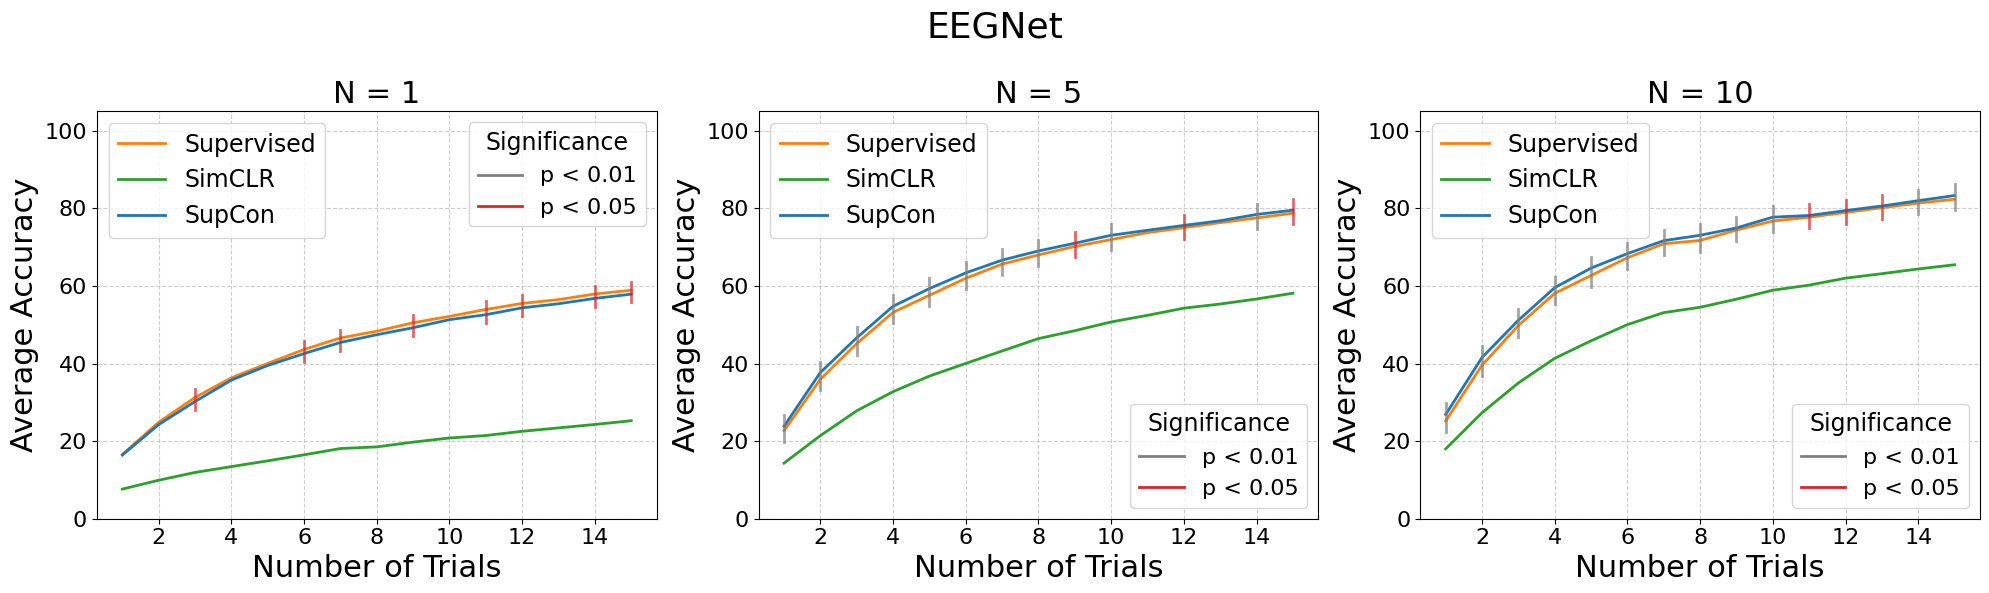

In [ ]:
file_paths = [
    os.path.join(scripts_folder, 'IntraEvaluation/Supervised_results/EEGNet_1CLS_evaluation_results.txt'),
    os.path.join(scripts_folder, 'IntraEvaluation/SimCLR_results/EEGNet_1CLS_evaluation_results.txt'),
    os.path.join(scripts_folder, 'IntraEvaluation/SupCon_results/EEGNet_1CLS_evaluation_results.txt')
]
eegnet_fig = process_results.plot_intra_and_BCI(file_paths, 'EEGNet')

Analysing data from 1 Retraining Chars

N Trials -> 1

Is data Normally Distributed? - False
Is Variance Homogeneous? - False

Friedman Test results: (F-stat = 627.1366160681224, p_value = 6.591953286062264e-137)
Post-hoc Wilcoxon tests for trial 1:
Wilcoxon test between Supervised and SimCLR: p-value = 7.23059626438688e-102
Wilcoxon test between SimCLR and SupCon: p-value = 4.105851385802694e-85
Wilcoxon test between Supervised and SupCon: p-value = 1.957408883689985e-17

N Trials -> 2

Is data Normally Distributed? - False
Is Variance Homogeneous? - False

Friedman Test results: (F-stat = 730.9527645551086, p_value = 1.8863570994092603e-159)
Post-hoc Wilcoxon tests for trial 2:
Wilcoxon test between Supervised and SimCLR: p-value = 4.406922552947462e-108
Wilcoxon test between SimCLR and SupCon: p-value = 6.340642601640355e-93
Wilcoxon test between Supervised and SupCon: p-value = 3.0726388426095543e-28

N Trials -> 3

Is data Normally Distributed? - False
Is Variance Homogeneous? - F

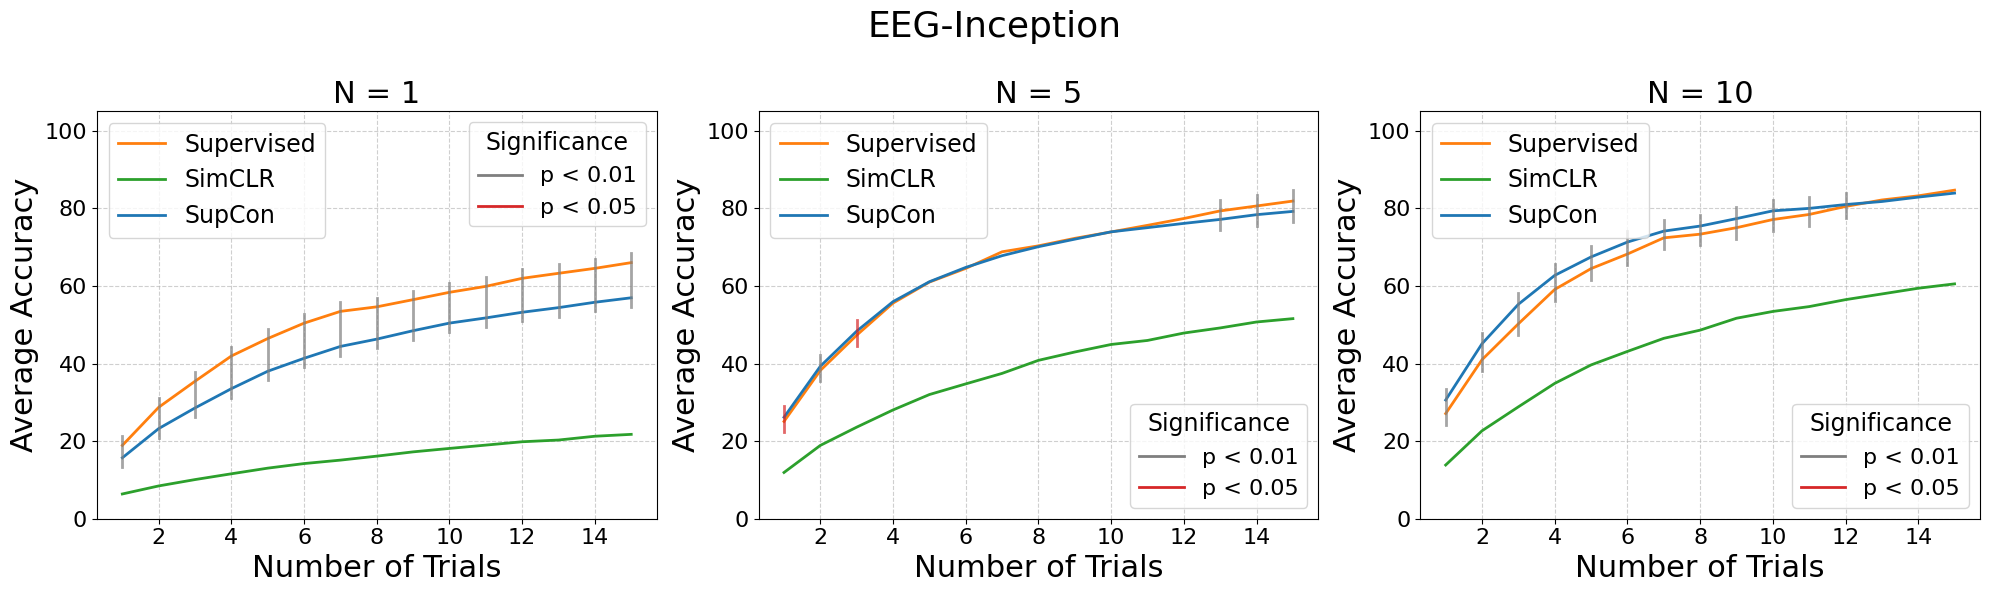

In [ ]:
file_paths = [
    os.path.join(scripts_folder, 'IntraEvaluation/Supervised_results/EEGInception_1CLS_evaluation_results.txt'),
    os.path.join(scripts_folder, 'IntraEvaluation/SimCLR_results/EEGInception_1CLS_evaluation_results.txt'),
    os.path.join(scripts_folder, 'IntraEvaluation/SupCon_results/EEGInception_1CLS_evaluation_results.txt')
]
eeginception_fig = process_results.plot_intra_and_BCI(file_paths, 'EEG-Inception')

Analysing data from 1 Retraining Chars

N Trials -> 1

Is data Normally Distributed? - False
Is Variance Homogeneous? - False

Friedman Test results: (F-stat = 594.3734533183361, p_value = 8.579155053674803e-130)
Post-hoc Wilcoxon tests for trial 1:
Wilcoxon test between Supervised and SimCLR: p-value = 6.2922955383844535e-93
Wilcoxon test between SimCLR and SupCon: p-value = 5.083304875750816e-88
Wilcoxon test between Supervised and SupCon: p-value = 0.6182933558723234

N Trials -> 2

Is data Normally Distributed? - False
Is Variance Homogeneous? - False

Friedman Test results: (F-stat = 650.2748710390567, p_value = 6.231690757496352e-142)
Post-hoc Wilcoxon tests for trial 2:
Wilcoxon test between Supervised and SimCLR: p-value = 1.6469705264547704e-100
Wilcoxon test between SimCLR and SupCon: p-value = 9.062970334019967e-96
Wilcoxon test between Supervised and SupCon: p-value = 0.005461456335599122

N Trials -> 3

Is data Normally Distributed? - False
Is Variance Homogeneous? - False

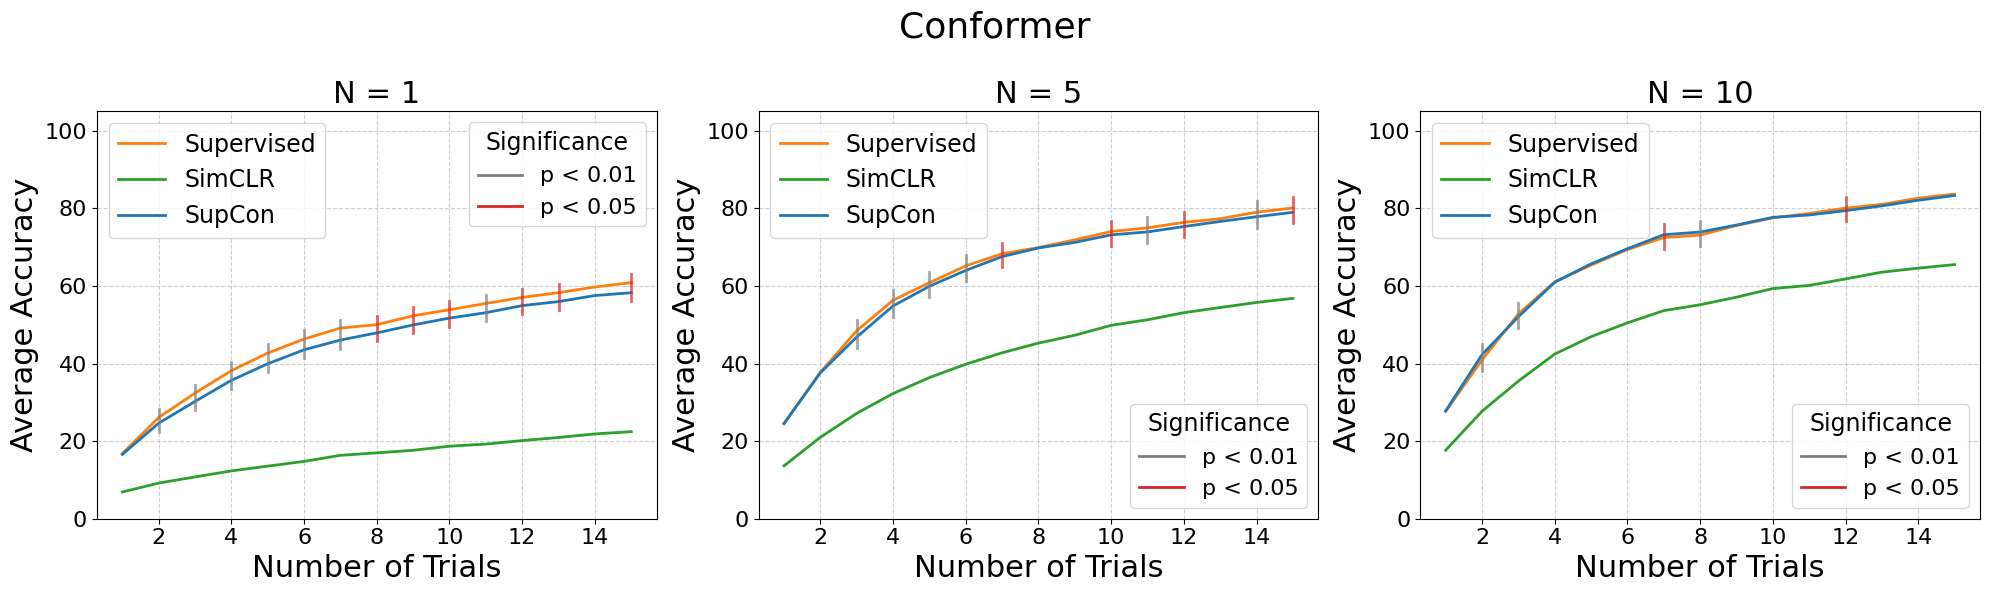

In [ ]:
file_paths = [
    os.path.join(scripts_folder, 'IntraEvaluation/Supervised_results/Conformer_1CLS_evaluation_results.txt'),
    os.path.join(scripts_folder, 'IntraEvaluation/SimCLR_results/Conformer_1CLS_evaluation_results.txt'),
    os.path.join(scripts_folder, 'IntraEvaluation/SupCon_results/Conformer_1CLS_evaluation_results.txt')
]
conformer_fig = process_results.plot_intra_and_BCI(file_paths, 'Conformer')

In [ ]:
from PIL import Image
# Load the images
parent_dir = os.path.dirname(os.getcwd())
image1 = Image.open(os.path.join(parent_dir, 'eegnet_intra.png'))
image2 = Image.open(os.path.join(parent_dir, 'eeginception_intra.png'))
image3 = Image.open(os.path.join(parent_dir, 'conformer_intra.png'))

# Get dimensions of the images
widths, heights = zip(*(img.size for img in [image1, image2, image3]))
max_width = max(widths)
total_height = sum(heights)

# Create a blank canvas for the vertical stack
combined_image = Image.new("RGB", (max_width, total_height))

# Paste images on top of each other
y_offset = 0
for img in [image1, image2, image3]:
    combined_image.paste(img, (0, y_offset))
    y_offset += img.height

# Save the combined image
combined_image.save("combined_intra_results.png")